In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Preprocessing 
from sklearn.preprocessing import StandardScaler
#Otros 
from scipy.stats import norm
from scipy import stats
import warnings #nos sirve para ignorar los warnings que puedan aparecer. Se utiliza aca solo con fines esteticos
warnings.filterwarnings('ignore')
%matplotlib inline
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')
from IPython.display import Image

In [2]:
colectivos = pd.read_csv(r'C:\Users\Alejandra\Google Drive\5° año\Ciencia de datos\tp\recorrido-colectivos.csv', delimiter=',')

In [3]:
colectivos.head(250)

,WKT,id,linea,ramal,sentido,tipo_servicio
0,LINESTRING (-58.6241775523004 -34.562824785931...,8438,175,ramal A,vuelta,Comun Básico
1,LINESTRING (-58.4625366780507 -34.555477676289...,8439,175,ramal A,ida,Comun Básico
2,LINESTRING (-58.4643456334173 -34.556405605456...,8440,169,ramal A,ida,Comun Básico
3,LINESTRING (-58.4643456334173 -34.556405605456...,8441,169,ramal B,ida,Comun Básico
4,LINESTRING (-58.6256284888545 -34.563150285754...,8442,169,ramal A,vuelta,Comun Básico
5,LINESTRING (-58.6256284888545 -34.563150285754...,8443,169,ramal B,vuelta,Comun Básico
6,LINESTRING (-58.5113251964821 -34.702184446938...,8449,103,ramal C,vuelta,Comun Básico
7,LINESTRING (-58.4394231525532 -34.628999839755...,8451,103,ramal C,ida,Comun Básico
8,LINESTRING (-58.4240632378167 -34.570832078882...,8458,160,ramal F,ida,Fraccionamiento
9,LINESTRING (-58.4163609623667 -34.652284234185...,8459,160,ramal I,ida,Fraccionamiento


In [4]:
colectivos.shape

(1110, 6)

In [5]:
op_sube = pd.read_csv(r'C:\Users\Alejandra\Google Drive\5° año\Ciencia de datos\tp\operaciones-sube-dia-habil-promedio-grilla-hexagonal-modo-hora.csv', delimiter=';')

In [6]:
op_sube.head()

,ID_HEXAGONO,MODO,HORA,OPERACIONES
0,13026909,BUS,17,17
1,13026909,BUS,18,6
2,13033073,BUS,8,4
3,13033073,BUS,17,11
4,13033073,BUS,18,1


In [7]:
op_sube.describe()

,ID_HEXAGONO,HORA,OPERACIONES
count,1.687850e+05,168785.000000,168785.000000
mean,1.459557e+07,12.443908,82.692864
std,3.029067e+05,6.187949,284.450744
min,1.302691e+07,0.000000,-30.000000
25%,1.440153e+07,7.000000,6.000000
50%,1.460491e+07,13.000000,22.000000
75%,1.476525e+07,18.000000,66.000000
max,1.549880e+07,23.000000,25060.000000


In [8]:
op_sube.shape

(168785, 4)

In [9]:
op_sube.isnull().sum()

ID_HEXAGONO    0
MODO           0
HORA           0
OPERACIONES    0
dtype: int64

In [10]:
colectivos.isnull().sum()

WKT               0
id                0
linea             0
ramal             0
sentido           0
tipo_servicio    30
dtype: int64

In [11]:
colectivos=colectivos.dropna(subset=["tipo_servicio"])

In [12]:
colectivos.isnull().sum()

WKT              0
id               0
linea            0
ramal            0
sentido          0
tipo_servicio    0
dtype: int64

In [13]:
colectivos.shape

(1080, 6)

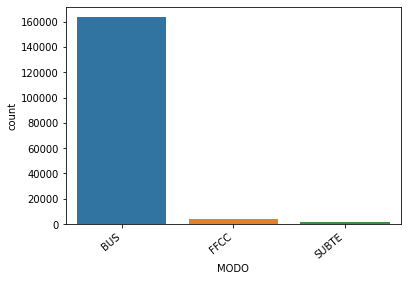

In [14]:
ax = sns.countplot(x="MODO", data=op_sube)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("")
plt.show()

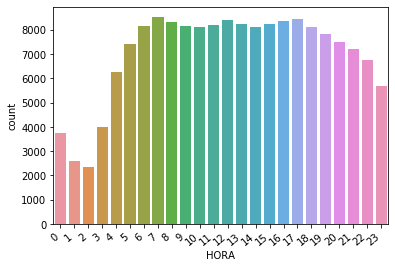

In [15]:
ax = sns.countplot(x="HORA", data=op_sube)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("")
plt.show()

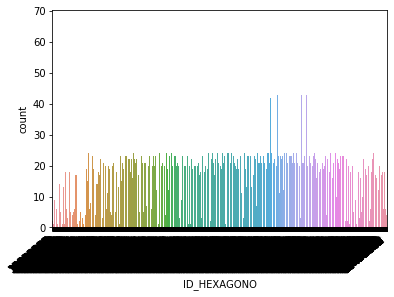

In [16]:
ax = sns.countplot(x="ID_HEXAGONO", data=op_sube)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.title("")
plt.show()

In [17]:
hexag1 = op_sube.loc[op_sube['ID_HEXAGONO'] == 13026909]

In [18]:
np.shape(hexag1)

(2, 4)

In [19]:
hexag1.head()

,ID_HEXAGONO,MODO,HORA,OPERACIONES
0,13026909,BUS,17,17
1,13026909,BUS,18,6


In [20]:
op_sube_pivot = pd.pivot_table(op_sube, values = 'OPERACIONES', columns = 'HORA', index = 'ID_HEXAGONO',fill_value=0, aggfunc = np.sum)

In [21]:
op_sube_pivot.head()

HORA,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
ID_HEXAGONO,,,,,,,,,,,,,,,,,,,,,
13026909,0,0,0,0,0,0,0,0,0,0,...,0,0,0,17,6,0,0,0,0,0
13033073,0,0,0,0,0,0,0,0,4,0,...,0,0,0,11,1,0,0,0,0,0
13033074,0,0,0,0,0,0,0,0,1,0,...,0,0,0,6,0,0,0,0,0,0
13039237,0,0,0,0,0,0,0,0,3,0,...,0,0,0,10,0,0,0,0,0,0
13063892,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0


In [22]:
np.shape(op_sube_pivot)

(9811, 24)

In [23]:
op_sube_pivot.isnull().sum()

HORA
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
dtype: int64

In [24]:
op_sube_pivot.head(100)

HORA,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
ID_HEXAGONO,,,,,,,,,,,,,,,,,,,,,
13026909,0,0,0,0,0,0,0,0,0,0,...,0,0,0,17,6,0,0,0,0,0
13033073,0,0,0,0,0,0,0,0,4,0,...,0,0,0,11,1,0,0,0,0,0
13033074,0,0,0,0,0,0,0,0,1,0,...,0,0,0,6,0,0,0,0,0,0
13039237,0,0,0,0,0,0,0,0,3,0,...,0,0,0,10,0,0,0,0,0,0
13063892,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,0
13094711,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13100874,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13107038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
13113201,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [25]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


In [26]:
import geopandas as gpd

In [30]:
grilla_hexag = pd.read_csv(r'C:\Users\Alejandra\Google Drive\5° año\Ciencia de datos\tp\grillahexagonal.csv', delimiter=',')

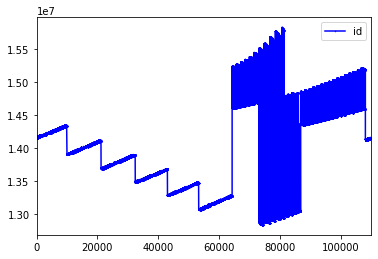

In [31]:
grilla_hexag.plot(marker='o', color='b', markersize=0.5)

In [32]:
grilla_hexag.head()

,WKT,WKT.1,id
0,MULTIPOLYGON (((-58.9348835284833 -34.97298188...,MULTIPOLYGON (((-58.9348835284833 -34.97298188...,14155026
1,MULTIPOLYGON (((-58.934420235376 -34.978349013...,MULTIPOLYGON (((-58.934420235376 -34.978349013...,14155027
2,MULTIPOLYGON (((-58.9339568197697 -34.98371613...,MULTIPOLYGON (((-58.9339568197697 -34.98371613...,14155028
3,MULTIPOLYGON (((-58.9334932816324 -34.98908324...,MULTIPOLYGON (((-58.9334932816324 -34.98908324...,14155029
4,MULTIPOLYGON (((-58.9367354765588 -34.95151326...,MULTIPOLYGON (((-58.9367354765588 -34.95151326...,14155022


AttributeError: 'Line2D' object has no property 'column'

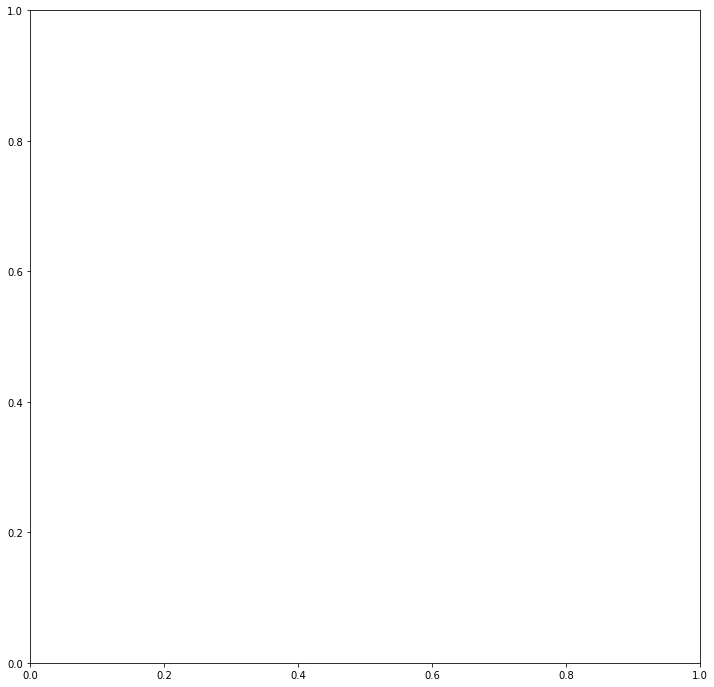

In [33]:
f, ax = plt.subplots(1, figsize=(12, 12))
ax = grilla_hexag.plot(column='WKT',linewidth=0.1,ax=ax)

In [34]:
grilla_hexag = grilla_hexag.rename(columns={'WKT': 'Geometry'})

In [35]:
grilla_hexag.head()

,Geometry,WKT.1,id
0,MULTIPOLYGON (((-58.9348835284833 -34.97298188...,MULTIPOLYGON (((-58.9348835284833 -34.97298188...,14155026
1,MULTIPOLYGON (((-58.934420235376 -34.978349013...,MULTIPOLYGON (((-58.934420235376 -34.978349013...,14155027
2,MULTIPOLYGON (((-58.9339568197697 -34.98371613...,MULTIPOLYGON (((-58.9339568197697 -34.98371613...,14155028
3,MULTIPOLYGON (((-58.9334932816324 -34.98908324...,MULTIPOLYGON (((-58.9334932816324 -34.98908324...,14155029
4,MULTIPOLYGON (((-58.9367354765588 -34.95151326...,MULTIPOLYGON (((-58.9367354765588 -34.95151326...,14155022


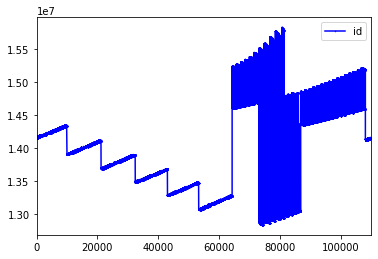

In [36]:
grilla_hexag.plot(marker='o', color='b', markersize=0.5)